# Model to predict a classification- survival or deceased

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train  = pd.read_csv("titanic_train.csv")
backup = train.copy()

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

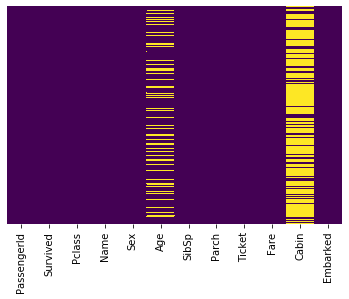

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

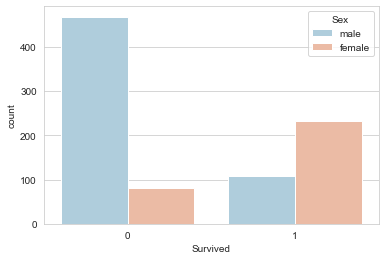

In [7]:
sns.set_style("whitegrid")

sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r")

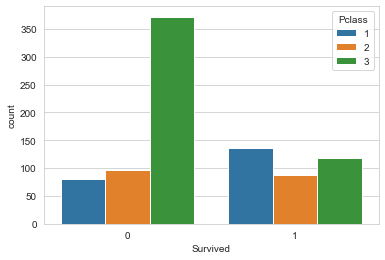

In [8]:
sns.countplot(x="Survived", data=train, hue="Pclass")

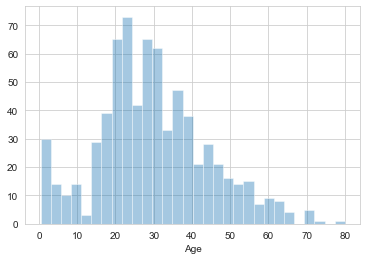

In [9]:
sns.distplot(train["Age"].dropna(), kde=False, bins=30)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


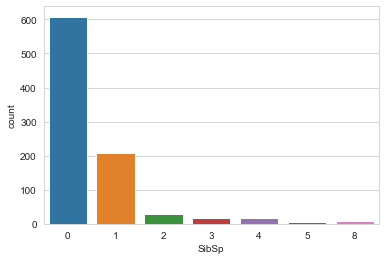

In [11]:
sns.countplot(x="SibSp",data=train)

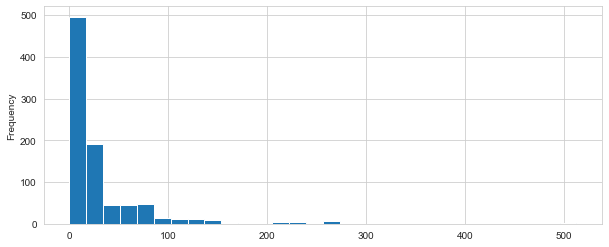

In [12]:
train["Fare"].plot.hist(bins=30,figsize=(10,4))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
def impute_age(cols):
    list_age = train.groupby("Pclass").mean()["Age"]
    
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return list_age[1]
        
        elif Pclass==2:
            return list_age[2]
            
        else:
            return list_age[3]
            
    else:
        return Age
            

In [15]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age,axis=1)

#train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

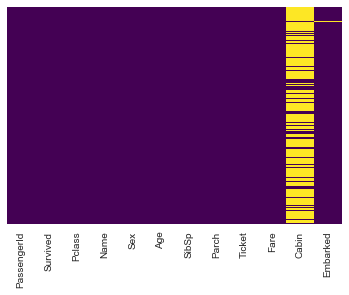

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
train.drop("Cabin", axis=1, inplace=True)

In [18]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

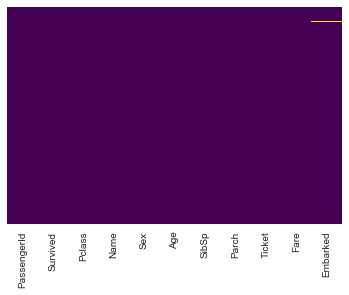

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.dropna(inplace=True)

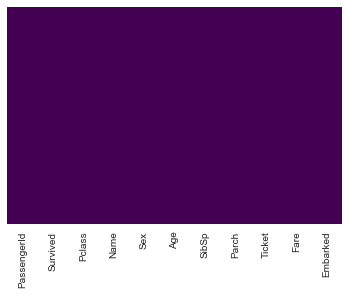

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [23]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [24]:
pclass = pd.get_dummies(train["Pclass"], drop_first=True)

In [25]:
name = pd.get_dummies(backup["Name"].str.split(expand=True)[1],drop_first=True)

In [26]:
backup["Name"].str.split(expand=True)[1]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: 1, Length: 891, dtype: object

In [27]:
name

Capt.  Carlo,  Col.  Cruyssen,  Don.  Dr.  Gordon,  Impe,  Jonkheer.  \
0        0       0     0          0     0    0        0      0          0   
1        0       0     0          0     0    0        0      0          0   
2        0       0     0          0     0    0        0      0          0   
3        0       0     0          0     0    0        0      0          0   
4        0       0     0          0     0    0        0      0          0   
..     ...     ...   ...        ...   ...  ...      ...    ...        ...   
886      0       0     0          0     0    0        0      0          0   
887      0       0     0          0     0    0        0      0          0   
888      0       0     0          0     0    0        0      0          0   
889      0       0     0          0     0    0        0      0          0   
890      0       0     0          0     0    0        0      0          0   

     Major.  ...  Pelsmaeker,  Planke,  Rev.  Shawah,  Steen,  Velde,  Walle,  \
0         0  ...            0        0     0        0       0       0       0   
1         0  ...            0        0     0        0       0       0       0   
2         0  ...            0        0     0        0       0       0       0   
3         0  ...            0        0     0        0       0       0       0   
4         0  ...            0        0     0        0       0       0       0   
..      ...  ...          ...      ...   ...      ...     ...     ...     ...   
886       0  ...            0        0     1        0       0       0       0   
887       0  ...            0        0     0        0       0       0       0   
888       0  ...            0        0     0        0       0       0       0   
889       0  ...            0        0     0        0       0       0       0   
890       0  ...            0        0     0        0       0       0       0   

     der  the  y  
0      0    0  0  
1      0    0  0  
2      0    0  0  
3      0    0  0  
4      0    0  0  
..   ...  ... ..  
886    0    0  0  
887    0    0  0  
888    0    0  0  
889    0    0  0  
890    0    0  0  

[891 rows x 30 columns]

In [28]:
train = pd.concat([train,sex,embark,pclass,name], axis=1)

In [29]:
train.head(3)

PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   

   Parch            Ticket     Fare  ... Pelsmaeker,  Planke,  Rev.  Shawah,  \
0    0.0         A/5 21171   7.2500  ...           0        0     0        0   
1    0.0          PC 17599  71.2833  ...           0        0     0        0   
2    0.0  STON/O2. 3101282   7.9250  ...           0        0     0        0   

   Steen,  Velde,  Walle,  der  the  y  
0       0       0       0    0    0  0  
1       0       0       0    0    0  0  
2       0       0       0    0    0  0  

[3 rows x 46 columns]

In [30]:
train.drop(["PassengerId","Sex","Embarked","Name","Ticket","Pclass"], axis=1,inplace=True)

In [31]:
train.head(3)

Survived   Age  SibSp  Parch     Fare  male    Q    S    2    3  ...  \
0       0.0  22.0    1.0    0.0   7.2500   1.0  0.0  1.0  0.0  1.0  ...   
1       1.0  38.0    1.0    0.0  71.2833   0.0  0.0  0.0  0.0  0.0  ...   
2       1.0  26.0    0.0    0.0   7.9250   0.0  0.0  1.0  0.0  1.0  ...   

   Pelsmaeker,  Planke,  Rev.  Shawah,  Steen,  Velde,  Walle,  der  the  y  
0            0        0     0        0       0       0       0    0    0  0  
1            0        0     0        0       0       0       0    0    0  0  
2            0        0     0        0       0       0       0    0    0  0  

[3 rows x 40 columns]

In [32]:
train.columns

Index([    'Survived',          'Age',        'SibSp',        'Parch',
               'Fare',         'male',            'Q',            'S',
                    2,              3,        'Capt.',       'Carlo,',
               'Col.',    'Cruyssen,',         'Don.',          'Dr.',
            'Gordon,',        'Impe,',    'Jonkheer.',       'Major.',
            'Master.',   'Melkebeke,', 'Messemaeker,',        'Miss.',
              'Mlle.',         'Mme.',          'Mr.',         'Mrs.',
                'Ms.',      'Mulder,',  'Pelsmaeker,',      'Planke,',
               'Rev.',      'Shawah,',       'Steen,',       'Velde,',
             'Walle,',          'der',          'the',            'y'],
      dtype='object')

In [33]:
X = train.drop("Survived", axis=1)

y = train["Survived"]

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression() 

In [38]:
logmodel.fit(X_train,y_train)

C:\Users\JASHAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
backup.head(2)

In [ ]:
type(backup["Name"])

In [ ]:
cmdf =pd.DataFrame(data = backup["Name"].str.split(expand=True)[1])

In [ ]:
test_data= backup["Name"].str.split(expand=True)[1]

In [ ]:
test_data.unique()